# Le premier projet de ML

### Mettre en place l'environement
- pip install -r requirements.txt

### Charger les données

On va regarder les données sur les prix des maisons à Iowa, États-Unis. Chargez le dataset dans un dataframe `home_data` et vérifiez les données récupérées (taille, valeurs manquantes, nature des descripteurs, déséquilibre des classes, etc.) 

In [1]:
import pandas as pd
from helpers import tp1_1 as tp1
# Chemin du fichier à lire
iowa_file_path = 'data/iowa_data.csv'

# Completer la ligne ci-dessous pour lire le fichier dans une variable home_data
home_data = pd.read_csv(iowa_file_path)

# # Execute la ligne ci-dessous pour vérifier que tu as bien chargé les données
tp1.step1.check(home_data)
# # Les lignes ci-dessous te permettent d'obtenir de l'aide si tu es bloqué
tp1.step1.hint()
tp1.step1.solution()

  1 home_data looks good. Good job!                                                                                

  1 # Use the `pd.read_csv` function                                                                               

  1 home_data = pd.read_csv(iowa_file_path)                                                                        

### Explorer les donnees (EDA) 



In [2]:
# Affiche les statistiques des données
print(home_data.shape) # Affiche le nombre de lignes et de colonnes
print(home_data.dtypes) # Affiche le type de chaque colonne
home_data.describe()

(1460, 81)
Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Les résultats affichent 8 chiffres pour chaque colonne de votre ensemble de données d'origine. Le premier nombre, le *count*, indique combien de lignes ont des valeurs non manquantes.

Les valeurs manquantes surviennent pour de nombreuses raisons. Par exemple, la taille de la 2ème chambre ne serait pas collectée lors de l'arpentage d'une maison 1 chambre. Les données manquantes sont un problème courant et vous devez apprendre à les gérer.

La deuxième valeur est le *mean*, qui est la moyenne. En dessous, *std* est l'écart type, qui mesure l'étalement numérique des valeurs.

Pour interpréter les valeurs *min, 25%, 50%, 75% et max*, imaginez que vous triez chaque colonne de la valeur la plus faible à la plus élevée. La première (la plus petite) valeur est le min. Si vous parcourez un quart de la liste, vous trouverez un nombre supérieur à 25% des valeurs et inférieur à 75% des valeurs. C'est la valeur de 25%. Les 50e et 75e centiles sont définis de manière analogue, et le maximum est le plus grand nombre.

In [3]:
from datetime import date

# Quelle est la taille moyenne du terrain (arrondie à l'entier le plus proche)?
avg_lot_size = round(home_data['LotArea'].mean())

# Quel est l'âge de la maison la plus récente (année actuelle - date de construction)
newest_home_age = date.today().year - home_data['YearBuilt'].max()

# Verifie tes résultats
tp1.step2.check(avg_lot_size, newest_home_age)
# Affiche de l'aide si tu es bloqué
# tp1.step2.hint()
# tp1.step2.solution()

In [4]:
# Supprime les lignes avec des valeurs manquantes dans la colonne SalePrice
# inplace = True permet de modifier le dataframe directement
home_data.dropna(axis=0, subset=['SalePrice'], inplace=True)


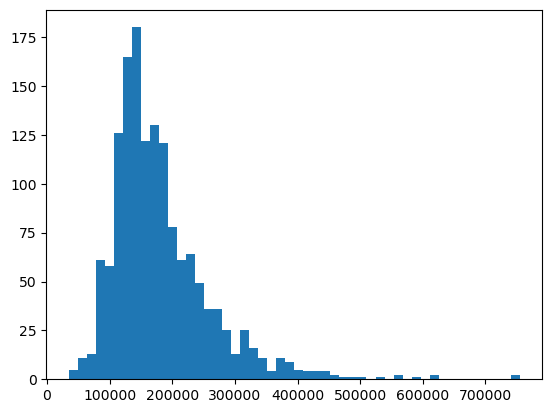

In [5]:
# Visualise le histogramme de la colonne SalePrice
import matplotlib.pyplot as plt
plt.hist(home_data.SalePrice, bins=50) # bins = nombre de barres
plt.show()

### Sélectionner la cible de prédiction et créer l'ensemble de données d'entrainement X



In [6]:
# Affiche la liste des colonnes pour trouver le nom de la variable cible
home_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
# Complète la ligne ci-dessous pour sélectionner la variable cible que tu veux prédire
y = home_data.SalePrice

# # Vérifie tes résultats
tp1.step3.check(y)
# # Ligne ci-dessous pour obtenir de l'aide si tu es bloqué
# tp1.step3.hint()
# tp1.step3.solution()

  1 Good job! That's right.                                                                                        

In [8]:
# Crée la liste des variables prédictives (features). Modifiez si vous voulez utiliser une autre liste.
feature_names = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
# ! ne jamais mettre d'id

# Selectionne les données correspondant aux variables prédictives
X = home_data[feature_names]
# Vérifie tes résultats
tp1.step4.check(X, feature_names)
# # Lignes ci-dessous pour obtenir de l'aide si tu es bloqué
# tp1.step4.hint()
# tp1.step4.solution()

  1 Good job! That's right.                                                                                        

### Découper des jeux de données
Utilisez la fonction train_test_split pour diviser vos données.
Donnez-lui l'argument random_state=1 pour que les fonctions de vérification sachent à quoi s'attendre lors de la vérification de votre code.
Rappelez-vous, vos fonctionnalités sont chargées dans le DataFrame X et votre cible est chargée dans y.


In [9]:
# Importer la fonction train_test_split 
from sklearn.model_selection import train_test_split

# Completer la ligne ci-dessous pour diviser les données en données d'entrainement et de validation
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

# Vérifie tes résultats
tp1.step5.check(train_X, val_X, train_y, val_y)
# Lignes ci-dessous pour obtenir de l'aide si tu es bloqué
# tp1.step5.hint()
# tp1.step5.solution()

  1 Good job! That's right.                                                                                        

### Spécifiez et entrainer (fitting) le modèle
Créez un `LinearRegression` et enregistrez-le iowa_model. Assurez-vous d'avoir effectué l'importation appropriée depuis sklearn pour exécuter cette commande.

Ensuite, ajustez le modèle que vous venez de créer en utilisant les données dans train_X, val_X, train_y, val_y que vous avez enregistrées ci-dessus.

In [10]:
from sklearn.linear_model import LinearRegression

# spécification du modèle, with different parameters
iowa_model = LinearRegression() 

# Completer la ligne ci-dessous: Entraîne (fitting) le modèle avec les données d'entrainement 
iowa_model.fit(train_X, train_y)
# ! Cela entraîne les données


# Vérifie tes résultats
tp1.step6.check(iowa_model)
# # Lignes ci-dessous pour obtenir de l'aide si tu es bloqué
# tp1.step6.hint()
# tp1.step6.solution()


  1 Good job! That's right.                                                                                        

### Faites des prédictions avec les données de validation

In [11]:
# Completer la ligne ci-dessous: Predire les valeurs de la variable cible pour les données de validation
val_predictions = iowa_model.predict(val_X)

# Vérifie tes résultats
tp1.step7.check(val_predictions)
# # Lignes ci-dessous pour obtenir de l'aide si tu es bloqué
# tp1.step7.hint()
# tp1.step7.solution()

  1 Good job! That's right.                                                                                        

In [12]:
# Affiche les 5 premières prédictions
print(val_predictions[:5].round())
# Affiche les 5 premières valeurs de la variable cible pour les données de validation
# # avec index
# print(val_y[:5])
# sans index
print(val_y[:5].values)

# ! Compare les valeurs entraînées avec les valeurs réelles

[223510. 158717. 110365. 101869. 141959.]
[231500 179500 122000  84500 142000]


### Calculer l'erreur absolue moyenne (mean_absolute_error) dans les données de validation

In [13]:
# importer la fonction mean_absolute_error
from sklearn.metrics import mean_absolute_error

# Complète la ligne ci-dessous pour calculer l'erreur absolue moyenne (MAE)
val_mae = mean_absolute_error(val_y, val_predictions)

# decommente la ligne ci-dessous pour voir la valeur de l'erreur absolue moyenne
# print(val_mae)

# Ecrire votre propre fonction pour renvoyer l'erreur absolue moyenne
def mae(y_true, y_pred):
    return abs(y_true - y_pred).mean()

val_mae_manuel = mae(val_y, val_predictions)
print(val_mae_manuel)

# Vérifie tes résultats
tp1.step8.check(val_mae, val_mae_manuel)
# # Lignes ci-dessous pour obtenir de l'aide si tu es bloqué
# tp1.step8.hint()
# tp1.step8.solution()

# Vérifie tes résultats
assert val_mae == val_mae_manuel, f"Votre implementation de MAE donne un resultat different, la difference est {abs(val_mae-val_mae_manuel)}"

# Est-ce que c'est normal que l'on voit une différence entre les deux valeurs de MAE ?
# Reponse : Oui, c'est normal car la difference est tres petite (10^-15) et est due a l'arrondi des nombres a virgule flottante.


27228.878903251305


### Utilisation des fonctions pour avoir un programme plus lisible

In [14]:

# On va mettre nos codes dans des fonctions pour pouvoir les réutiliser plus tard
# Fonction pour netttoyer les données
def clean_data(data, target_name):
    # Supprime les lignes avec des valeurs manquantes dans la colonne SalePrice
    data.dropna(axis=0, subset=[target_name], inplace=True)
    return data

# Fonction pour diviser les données en données d'entrainement et de validation
def split_data(data, feature_names, target_name):
    # Sélectionne la variable cible que tu veux prédire
    y = data[target_name]
    # Sélectionne les données correspondant aux variables prédictives
    X = data[feature_names]
    # Divise les données en données d'entrainement et de validation
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
    return train_X, val_X, train_y, val_y

# fonction pour entrainer le modèle et evaluer les performances
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)


In [15]:
# on relance tous les etapes
def run_experiment():
    target_name = 'SalePrice'
    # Charger les données
    iowa_file_path = 'data/iowa_data.csv'
    home_data = pd.read_csv(iowa_file_path)
    # Nettoyer les données
    home_data = clean_data(home_data, target_name)
    # ! Enlever les valeurs manquantes
    # Sélectionner les variables prédictives et la variable cible
    feature_names = [
        'LotArea',
        'YearBuilt',
        '1stFlrSF',
        '2ndFlrSF',
        'FullBath',
        'BedroomAbvGr',
        'TotRmsAbvGrd'
    ]
    # ! Critères
    # Diviser les données en données d'entrainement et de validation
    train_X, val_X, train_y, val_y = split_data(home_data, feature_names, target_name)
    # ! Découpages
    # Evaluer la performance du modèle
    val_mae = score_dataset(train_X, val_X, train_y, val_y)
    # ! Afficher les erreurs du modèle
    print(val_mae)

run_experiment()

27228.878903251305


### Utiliser toutes les variables prédictives numériques qui contienent de valeurs manquantes 
- On remplace le code pour utiliser toutes les variables (linges 7-10) sans nettoyer de données avec home_data = clean_data(home_data)
- On aura une erreur si on essaie de construire un modèle avec des valeurs manquantes.

In [16]:
# on relance tous les etapes
def run_experiment_on_data_with_missing_values():
    # Charger les données
    iowa_file_path = 'data/iowa_data.csv'
    home_data = pd.read_csv(iowa_file_path)

    ############## MODIFICATION : utiliser toutes les variables prédictives numériques ####################
    predictors = home_data.drop(['SalePrice'], axis=1)
    feature_names = predictors.columns[predictors.dtypes != 'object']
    target_name = 'SalePrice'
    ################################################################################

    # Diviser les données en données d'entrainement et de validation
    train_X, val_X, train_y, val_y = split_data(home_data, feature_names, target_name)
    # Evaluer la performance du modèle
    val_mae = score_dataset(train_X, val_X, train_y, val_y)
    print("Error du modèle: ", val_mae)

run_experiment_on_data_with_missing_values()

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

### Imputation

L'imputation remplit les valeurs manquantes avec un nombre. Par exemple, nous pouvons remplir la valeur moyenne le long de chaque colonne.

Les valeurs imputées ne seront pas exactement correctes dans la plupart des cas, mais elles conduisent généralement à des modèles plus précis que ceux que vous obtiendriez en supprimant complètement la colonne.

Utiliser le code suivant pour imputer les valeurs manquantes avec la valeur moyenne le long de chaque colonne. Définissez les DataFrames prétraités sur imputed_X_train et imputed_X_valid. Assurez-vous que les noms de colonnes correspondent à ceux de X_train et X_valid.

In [20]:
# on relance tous les etapes
def run_experiment_on_data_with_imputed_values():
    # Charger les données
    iowa_file_path = 'data/iowa_data.csv'
    home_data = pd.read_csv(iowa_file_path)

    ############## MODIFICATION : utiliser toutes les variables prédictives numériques ####################
    predictors = home_data.drop(['SalePrice'], axis=1)
    feature_names = predictors.columns[predictors.dtypes != 'object']
    target_name = 'SalePrice'
    ################################################################################

    train_X, val_X, train_y, val_y = split_data(home_data, feature_names, target_name)

    ############## MODIFICATION : imputer les values manquantes par la value moyenne ####################
    # Remplacer les valeurs manquantes par la moyenne de la colonne
    from sklearn.impute import SimpleImputer
    # Imputation
    my_imputer = SimpleImputer()
    imputed_X_train = pd.DataFrame(my_imputer.fit_transform(train_X))
    imputed_X_valid = pd.DataFrame(my_imputer.transform(val_X))
    # l'imputation a supprimé les noms de colonnes; remets-les
    imputed_X_train.columns = train_X.columns
    imputed_X_valid.columns = val_X.columns
    ################################################################################


    # Evaluer la performance du modèle
    val_mae = score_dataset(imputed_X_train, imputed_X_valid, train_y, val_y)
    print("Error du modèle: ", val_mae)

run_experiment_on_data_with_imputed_values()

Error du modèle:  21412.258132486266
